In [1]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [134]:
pd.set_option('display.precision', 10)

In [135]:
df = pd.read_csv("../data/week_1/circle_R5/hestersys_research_b5/R.csv", header=None, usecols=[3,4,10], names=['t', 'x', 'y'])
df

,t,x,y
0,-0.0499999970,-0.3999999762,-0.0799999982
1,-0.0499599986,-0.4799999893,-0.0799999982
2,-0.0499199964,-0.4799999893,-0.1599999964
3,-0.0498799980,-0.5600000024,-0.2399999946
4,-0.0498399958,-0.5600000024,-0.2399999946
...,...,...,...
2495,0.0498000011,-0.1599999964,0.4799999893
2496,0.0498399995,-0.1599999964,0.3199999929
2497,0.0498800017,-0.2399999946,0.2399999946
2498,0.0499200001,-0.2399999946,0.1599999964


In [255]:
df.hvplot.scatter(x='x', y='y')

:Scatter   [x]   (y)

In [137]:
# df = df.drop(['tx', 'new_x'], axis = 1)
df.hvplot.scatter(x='t')

:NdOverlay   [Variable]
   :Scatter   [t]   (value)

In [1]:
def harmonic(t, a, w, p):
    return a * np.cos(w * t + p)

def harmonic_fit(df, x='t', y='x', a0=3, w0=1.1, p0=0):

    fit_params, covariances = curve_fit(harmonic, df[x], df[y], p0=[a0, w0, p0], bounds=([0, 0, -2 * np.pi], [np.inf, np.inf, 2 * np.pi]))

    fit = harmonic(df['t'], *fit_params)

    f1 =  plt.figure()
    plt.plot(df[x], fit)
    plt.plot(df[x], df[y])

    return fit_params

def find_phase_shift(df, p1, p2, w):
    t = df['t']

    t0 = abs(p1 - p2) / w
    difference_array = np.absolute(t-t0)

    # find the index of minimum element from the array
    n = difference_array.argmin()
    print(f"to index is {n}")
    return n

def fix_phase_shift(df ,n):
    x = list(df['x'][n:])
    y = list(df['y'][:len(df) - n])
    return x, y
    

def polyarea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def area(p):
    return 0.5 * abs(sum(x0*y1 - x1*y0 for ((x0, y0), (x1, y1)) in segments(p)))

def segments(p):
    return zip(p, p[1:] + [p[0]])

def findzeros(xaxis,yaxis):
    negativezero = [xaxis[5],yaxis[5]]
    positivezero = [xaxis[5],yaxis[5]]
    for k in range(len(yaxis)):
        if abs(yaxis[k]) <= abs(negativezero[1]) and xaxis[k] <= 0:
            negativezero[1] = yaxis[k]
            negativezero[0] = xaxis[k]
        elif abs(yaxis[k]) <= abs(negativezero[1]) and xaxis[k] >= 0:
            positivezero[1] = yaxis[k]
            positivezero[0] = xaxis[k]
    return (positivezero,negativezero)

## Phase

In [ ]:
phase_df = pd.read_csv("../data/week_1/circle_R5/zero_state_without_metals_R5.csv", header=None, usecols=[3,4,10], names=['t', 'x', 'y'])
phase_df

,t,x,y
0,-0.02580,-13.200000,-0.528
1,-0.02578,-13.200000,-0.576
2,-0.02576,-13.200000,-0.528
3,-0.02574,-13.200000,-0.560
4,-0.02572,-13.200000,-0.544
...,...,...,...
2495,0.02410,14.000000,0.592
2496,0.02412,14.000000,0.576
2497,0.02414,14.000000,0.576
2498,0.02416,14.400001,0.576


In [178]:
# df['tx'] = df['t']
# df['tx'] += relativ_phase / fit_params[1]

[ 14.00461847 313.97254937  -2.89306787]


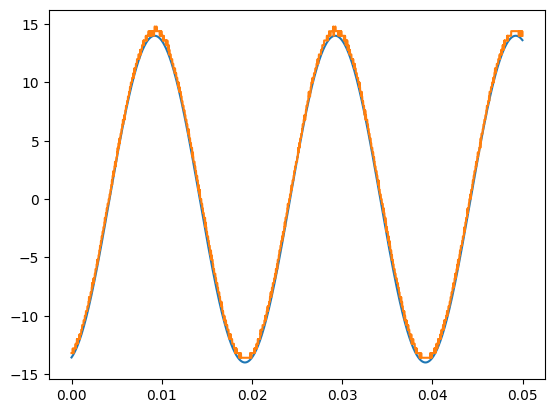

In [247]:
fit_params_x = harmonic_fit(phase_df, a0=15, w0=313)
print(fit_params_x)

[  0.60890772 314.00833264  -2.76519486]


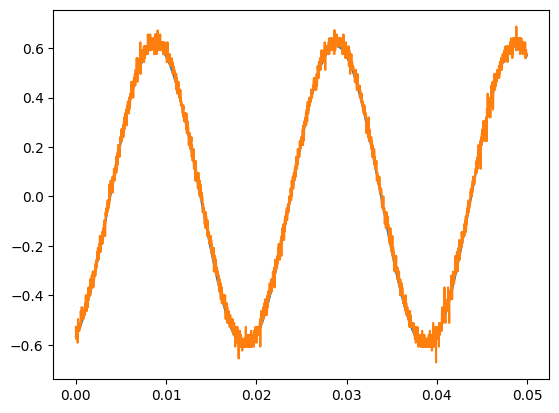

In [248]:
fit_params_y = harmonic_fit(phase_df, y='y',a0=0.6, w0=313)
print(fit_params_y)

In [256]:
n = find_phase_shift(phase_df, fit_params_x[2], fit_params_y[2], fit_params_x[1])

to index is 20


20

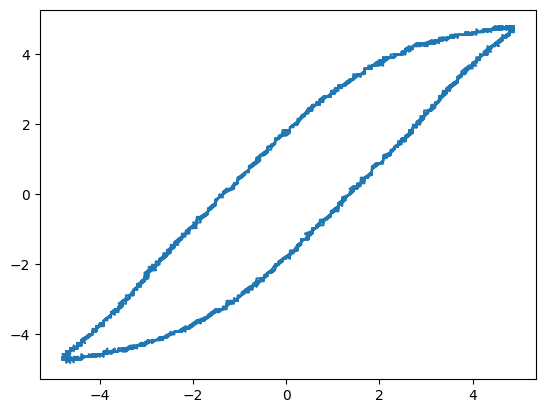

In [257]:
x, y = fix_phase_shift(df, 20)
plt.plot(x, y)